## **GRIP - TSF | Data Science & Business Analytics Internship**
### **Task 5 : Stock Market Prediction using numerical & textual analysis**
### Author : AYOUB EL AAMRI.

### Task :
    * Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and   sentimental analysis of news headlines
    * In this I have predicted if a companies stock will increase or decrease based on news headlines using sentiment analysis.

    * This model will determine if the price of a stock will increase or decrease based on the sentiment of top news article headlines for the current day using Python and machine learning.

    * I have used both numerical and textual data for this.

    (i) Time series analysis is performed on the Stock data.
    
    (ii) Sentiment analysis is performed on the News data.
    
    (iii) An analysis is performed by merging both the data to predict if the Close price of the stock will increase or decrease.

   ## Stock Market Prediction

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import pandas_datareader.data as web
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from textblob import TextBlob
from matplotlib import rcParams
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from statsmodels.tsa.stattools import adfuller
import pmdarima as pmd

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost 
import lightgbm

## Importing stocks data from web

In [169]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime.today()

In [170]:
stocks = web.DataReader("AAPL", 'yahoo', start, end)

In [171]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3033 entries, 2010-01-04 to 2022-01-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       3033 non-null   float64
 1   Low        3033 non-null   float64
 2   Open       3033 non-null   float64
 3   Close      3033 non-null   float64
 4   Volume     3033 non-null   float64
 5   Adj Close  3033 non-null   float64
dtypes: float64(6)
memory usage: 165.9 KB


In [172]:
stocks.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.553025
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.564354
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.459939
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.447998
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.490867


In [173]:
stocks.reset_index(inplace=True)

In [174]:
stocks.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
3028,2022-01-12,177.179993,174.820007,176.119995,175.529999,74805200.0,175.529999
3029,2022-01-13,176.619995,171.789993,175.779999,172.190002,84505800.0,172.190002
3030,2022-01-14,173.779999,171.089996,171.339996,173.070007,80355000.0,173.070007
3031,2022-01-18,172.539993,169.410004,171.509995,169.800003,90956700.0,169.800003
3032,2022-01-19,171.080002,165.940002,170.000000,166.229996,94518300.0,166.229996


In [175]:
stocks.shape

(3033, 7)

In [176]:
stocks.describe()

,High,Low,Open,Close,Volume,Adj Close
count,3033.000000,3033.000000,3033.000000,3033.000000,3.033000e+03,3033.000000
mean,43.669061,42.774728,43.218778,43.239106,2.695484e+08,41.514832
std,39.320328,38.423666,38.862157,38.889807,2.257868e+08,39.415188
min,7.000000,6.794643,6.870357,6.858929,4.100000e+07,5.880606
25%,18.676071,18.371786,18.535713,18.557501,1.090784e+08,16.236654
50%,28.584999,28.067499,28.344999,28.350000,1.832380e+08,26.140265
75%,49.000000,48.107498,48.535000,48.537498,3.702804e+08,47.289509
max,182.940002,179.119995,182.630005,182.009995,1.880998e+09,182.009995


### Data cleaning

In [177]:
stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.553025
1,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.564354
2,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.459939
3,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.447998
4,2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.490867


### Missing Values

In [178]:
stocks.isna().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

### Visualizing the data -Close Price

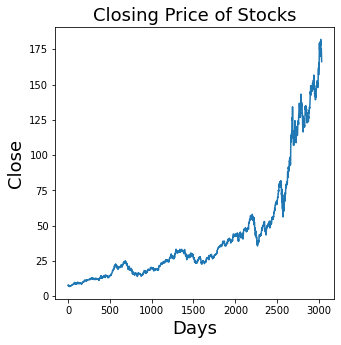

In [179]:
plt.figure(figsize=(5,5))
plt.title('Closing Price of Stocks', fontsize = 18)
plt.xlabel('Days', fontsize= 18)
plt.ylabel('Close', fontsize = 18)
plt.plot(stocks['Close'])
plt.show()

### Visualizing the data -Open Price

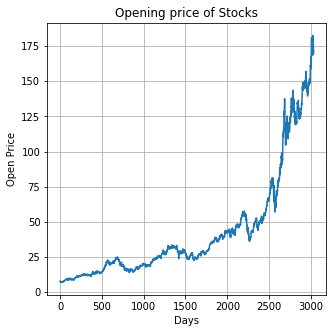

In [180]:
plt.figure(figsize=(5,5))
plt.grid(True)
plt.plot(stocks['Open'])
plt.xlabel('Days')
plt.ylabel('Open Price')
plt.title('Opening price of Stocks')
plt.show()

### Visualising Stocks returns

Text(0.5, 1.0, 'Stock Returns')

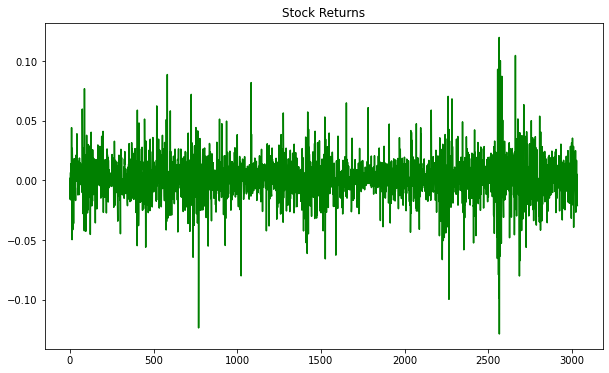

In [181]:
close = stocks['Close']
returns = close / close.shift(1) - 1

plt.figure(figsize = (10,6))
returns.plot(label='Return', color = 'g')
plt.title("Stock Returns")

## Time series Analysis - For Close Price
We can also perform the same analysis for Open price as well

   Time series decomposition involves thinking of a series as a combination of level, trend, seasonality, and noise components.
 we need to separate seasonality and trend from our series. The resultant series will become stationary through this process.

### Splitting data into train and test data

In [182]:
train = stocks[:1600]
test = stocks[1600:]

In [183]:
train.shape, test.shape

((1600, 7), (1433, 7))

### Decomposition of Time series

### Stationarity

A stationary process has a mean and variance that do not change overtime and the process does not have trend.

The above time series does not look stationary.

To confirm that we will use “Dickey-Fuller test” to determine stationarity.

Dickey-Fuller test for variable

### Dickey-Fuller test

In [184]:
def adfullerTest(X):
    result = adfuller(X,autolag = 'AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('No of Lags Used: %f' % result[2])
    print('Number of Obs Used: %f' % result[3])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    if result[1] <=0.05 :
         print("Reject against the null hypothesis, time series is stationary")
    else:
        print("Accept null hypothesis, time series is non-stationary ") 

In [185]:
adfullerTest(train['Close'])


ADF Statistic: -1.571343
p-value: 0.497971
No of Lags Used: 0.000000
Number of Obs Used: 1599.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Accept null hypothesis, time series is non-stationary 


We can see that our statistic value of -1.5 is greater than the value of -3.43 at 1% critical value.
   By Comparing the test statistic to the critical values, it looks like we would have to fail to reject the null hypothesis that the time series is non-stationary and does have time-dependent structure.

##### Rolling Statistics

Text(0.5, 1.0, 'Mean and Standard Deviation on  transformed data')

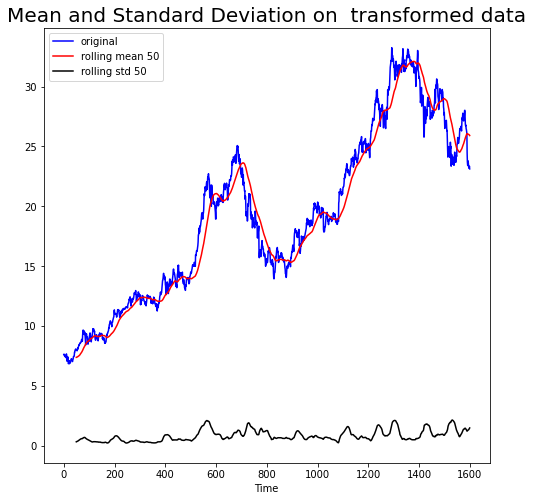

In [186]:
rolling_mean_50 = (train['Close']).rolling(window=50).mean()
rolling_std_50 = (train['Close']).rolling(window=50).std()
plt.figure(figsize = (8,8))
plt.plot((train['Close']), color = 'blue', label = 'original')
plt.plot(rolling_mean_50, color = 'red', label = 'rolling mean 50')
plt.plot(rolling_std_50, color = 'black', label = 'rolling std 50')
plt.xlabel('Time')
plt.legend()
plt.title('Mean and Standard Deviation on  transformed data',  fontsize = 20)


Since the data shows changing variance over time, the first thing we will do is stabilize the variance by applying log transformation using the log() function. The resulting series will be a linear time series.

### Log Transfromation

Let’s log transform the dataset again to make the distribution of values more linear and better meet the expectations of this statistical test.

In [187]:
train_log = np.log(train['Close']) 
test_log = np.log(test['Close'])

In [188]:
from numpy import log
adfullerTest(log(train['Close']))

ADF Statistic: -2.040940
p-value: 0.268916
No of Lags Used: 0.000000
Number of Obs Used: 1599.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Accept null hypothesis, time series is non-stationary 


Running this shows a negative value for the test statistic.

We can see that the value is larger than the critical values, again, meaning that we can fail to reject the null hypothesis and in turn that the time series is non-stationary.

Text(0.5, 1.0, 'Mean and Standard Deviation on Log transformed data')

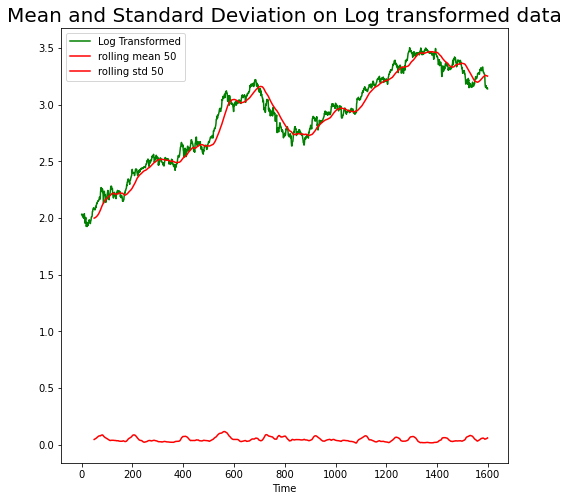

In [189]:
rolling_mean_50 = log(train['Close']).rolling(window=50).mean()
rolling_std_50 = log(train['Close']).rolling(window=50).std()
plt.figure(figsize = (8,8))
plt.plot(log(train['Close']), color = 'g', label = 'Log Transformed')
plt.plot(rolling_mean_50, color = 'r', label = 'rolling mean 50')
plt.plot(rolling_std_50, color = 'r', label = 'rolling std 50')
plt.xlabel('Time')
plt.legend()
plt.title('Mean and Standard Deviation on Log transformed data',  fontsize = 20)


##### To Removing Linear Trend

###### We will now perform the first difference transformation to our series to remove the linear trend.

In [190]:
mean_log = log(train['Close']).rolling(50).mean()

In [191]:
train_log_diff = log(train['Close']) - mean_log
train_log_diff.dropna(inplace = True)
adfullerTest(train_log_diff)

ADF Statistic: -4.920769
p-value: 0.000032
No of Lags Used: 1.000000
Number of Obs Used: 1549.000000
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568
Reject against the null hypothesis, time series is stationary


Text(0.5, 1.0, 'Mean and Standard Deviation on Differential Log Transformed data')

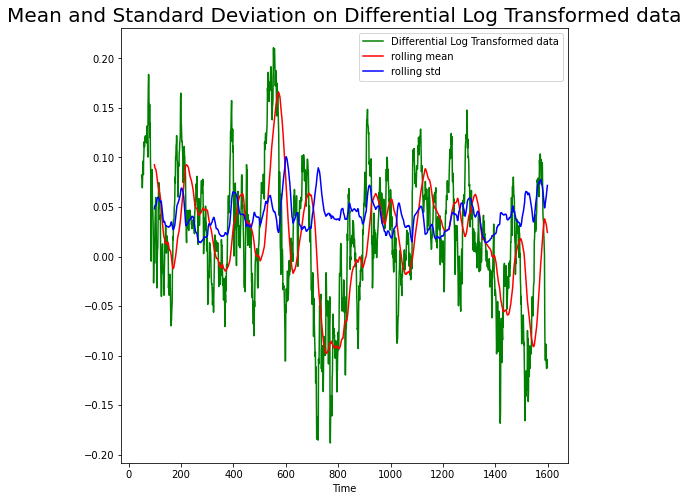

In [192]:
data=   train_log_diff
mean = data.rolling(50).mean()
std = data.rolling(50).std()
plt.figure(figsize = (8,8))
plt.plot(data, color = 'g', label = 'Differential Log Transformed data')
plt.plot(mean, color = 'r', label = 'rolling mean')
plt.plot(std, color = 'b', label = 'rolling std')
plt.xlabel('Time')
plt.legend()
plt.title('Mean and Standard Deviation on Differential Log Transformed data',  fontsize = 20)

Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.
Here we can also observe that there is no such trend in mean and Standard deviation
So the now time series is statinary

Now the data is stationary we can apply ARIMA model to our data

### ARIMA Model 

    AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
    I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
    MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

The parameters of the ARIMA model are defined as follows:

    p: The number of lag observations included in the model, also called the lag order.
    d: The number of times that the raw observations are differenced, also called the degree of differencing.
    q: The size of the moving average window, also called the order of moving average.

In [193]:
def arimamodel(timeseriesarray):
    autoarima_model = pmd.auto_arima(timeseriesarray, 
                             # start_p=1, 
                              #start_q=1,
                              #test="adf",
                              trace=True,
                              error_action = 'ignore',
                              suppress_warnings = True)
    return autoarima_model

In [194]:
stocks_arima = arimamodel((train_log))
stocks_arima.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-8500.662, Time=3.99 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-8506.438, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-8505.002, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-8505.002, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-8505.757, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-8502.973, Time=0.75 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 5.660 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1600
Model:               SARIMAX(0, 1, 0)   Log Likelihood                4255.219
Date:                Thu, 20 Jan 2022   AIC                          -8506.438
Time:                        13:53:37   BIC                          -8495.684
Sample:                             0   HQIC                         -8502.444
                               - 1600                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0007      0.000      1.626      0.104      -0.000       0.002
sigma2         0.0003   5.65e-06     50.620      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.57   Jarque-Bera (JB):              1376.33
Prob(Q):                              0.45   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                            -0.31
Prob(H) (two-sided):                  0.33   Kurtosis:                         7.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

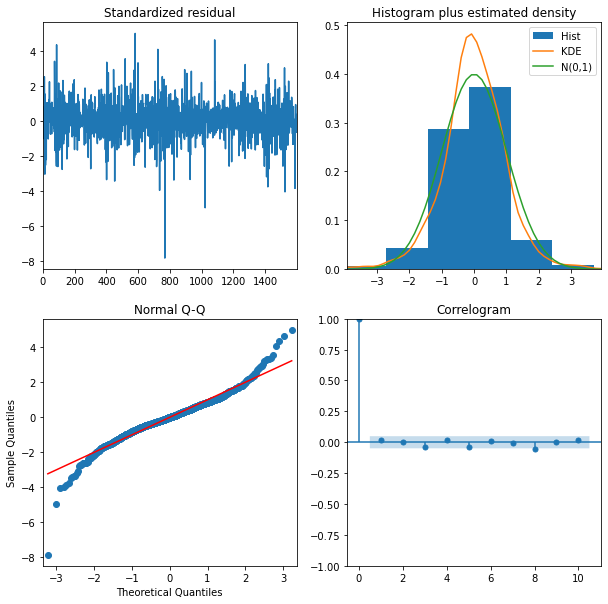

In [195]:
stocks_arima.plot_diagnostics(figsize=(10,10))
plt.show()

### Predictions on test data

In [196]:
predict_ClosePrice = stocks_arima.predict(n_periods = len(test_log))
predict_ClosePrice = pd.DataFrame(predict_ClosePrice,index = test_log.index,columns=['predict_ClosePrice'])

Text(0, 0.5, 'Actual Stock Price')

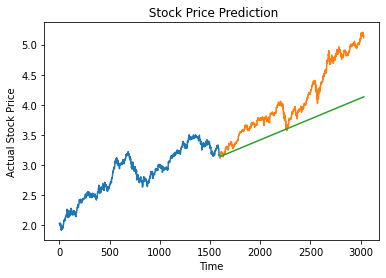

In [197]:
plt.plot(train_log, label='Train')
plt.plot(test_log, label='Test')
plt.plot(predict_ClosePrice, label='Prediction')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')

### Validation of the Arima Model

In [198]:
print('Mean Squared Error      ',mean_squared_error(test_log, predict_ClosePrice))
print('Root Mean_Squared_Error ',np.sqrt(mean_squared_error(test_log, predict_ClosePrice)))
print('Mean Absolute Error     ',mean_absolute_error(test_log, predict_ClosePrice))
print('R-Squared               ',r2_score(test_log, predict_ClosePrice))

Mean Squared Error       0.28921114998235947
Root Mean_Squared_Error  0.5377835530976747
Mean Absolute Error      0.44778369106127985
R-Squared                0.0919575716551786


## Analyzing  news dataset 

In [199]:
news=pd.read_csv("india-news-headlines.csv")

In [200]:
news.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [201]:
news['publish_date'] = pd.to_datetime(news['publish_date'],format= '%Y%m%d')
news.head()

,publish_date,headline_category,headline_text
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
2,2001-01-02,unknown,America's unwanted heading for India?
3,2001-01-02,unknown,For bigwigs; it is destination Goa
4,2001-01-02,unknown,Extra buses to clear tourist traffic


In [202]:
news.isna().sum()

publish_date         0
headline_category    0
headline_text        0
dtype: int64

In [203]:
news.shape

(3424067, 3)

In [204]:
(news.columns)

Index(['publish_date', 'headline_category', 'headline_text'], dtype='object')

### Analaysing "HEADLINE_CATEGORY" with "CITIES"

In [205]:
news['headline_category'].value_counts().head()

india                      288541
unknown                    209582
city.mumbai                134428
city.delhi                 127717
business.india-business    116761
Name: headline_category, dtype: int64

In [206]:
cities = news[news['headline_category'].str.contains('^city\.[a-z]+$', regex=True)]
cities.head(10)

,publish_date,headline_category,headline_text
273,2001-01-04,city.bengaluru,Three in race for chief secy's post
274,2001-01-04,city.patna,Druggists' stir leads to shortage of medicines
277,2001-01-04,city.bengaluru,He's not so inscrutable
278,2001-01-04,city.delhi,DPCC stages Nyay rally
642,2001-01-10,city.patna,Fend for yourselves; Pande tells doctors
643,2001-01-10,city.patna,Bureaucracy undermining legislature's 'existence'
644,2001-01-10,city.patna,State police collapses under pressure
645,2001-01-10,city.patna,Court declares Pappu Yadav an absconder
2215,2001-03-09,city.delhi,Maneka asks govt to take back land for cow she...
3603,2001-04-23,city.ahmedabad,Killer was promised Rs 25;000 for killing Nair...


In [207]:
city = pd.DataFrame(columns = ['city_name'])
city['city_name'] = cities.headline_category.str.split('.',expand = True)[1]
cities = pd.concat([cities, city], axis = 1)
cities.head()


,publish_date,headline_category,headline_text,city_name
273,2001-01-04,city.bengaluru,Three in race for chief secy's post,bengaluru
274,2001-01-04,city.patna,Druggists' stir leads to shortage of medicines,patna
277,2001-01-04,city.bengaluru,He's not so inscrutable,bengaluru
278,2001-01-04,city.delhi,DPCC stages Nyay rally,delhi
642,2001-01-10,city.patna,Fend for yourselves; Pande tells doctors,patna


In [208]:
cities.drop('headline_category', inplace =True,axis =1)


In [209]:
cities.head()

,publish_date,headline_text,city_name
273,2001-01-04,Three in race for chief secy's post,bengaluru
274,2001-01-04,Druggists' stir leads to shortage of medicines,patna
277,2001-01-04,He's not so inscrutable,bengaluru
278,2001-01-04,DPCC stages Nyay rally,delhi
642,2001-01-10,Fend for yourselves; Pande tells doctors,patna


In [210]:
cites = cities.groupby(cities['city_name']).agg({'headline_text':'count'})
cites.head()

,headline_text
city_name,
agartala,1183
agra,4884
ahmedabad,89513
ajmer,1587
allahabad,19285


In [211]:
cites.rename(columns = {'headline_text':'headline_count'}, inplace = True)

In [212]:
cites = cites.sort_values(by='headline_count',ascending=False)
cites.head()

,headline_count
city_name,
mumbai,134428
delhi,127717
chandigarh,110453
hyderabad,104692
bengaluru,93663


In [213]:
top10cites = cites.head(10)


In [214]:
def fig_plot(top10cites,title1):
    fig = px.line(top10cites,title =title1)
    for i in top10cites.columns[0:]:
        fig.add_bar(x= top10cites.index ,y = top10cites['headline_count'],name = i)
    fig.show()


In [215]:
fig_plot(top10cites,'Count of Headlines for top10 Cities')

In [216]:
cities.head()


,publish_date,headline_text,city_name
273,2001-01-04,Three in race for chief secy's post,bengaluru
274,2001-01-04,Druggists' stir leads to shortage of medicines,patna
277,2001-01-04,He's not so inscrutable,bengaluru
278,2001-01-04,DPCC stages Nyay rally,delhi
642,2001-01-10,Fend for yourselves; Pande tells doctors,patna


### Analaysing "HEADLINE_CATEGORY" with "CATEGORIES"

In [217]:
news.head()

,publish_date,headline_category,headline_text
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
2,2001-01-02,unknown,America's unwanted heading for India?
3,2001-01-02,unknown,For bigwigs; it is destination Goa
4,2001-01-02,unknown,Extra buses to clear tourist traffic


In [218]:
news['category']=news['headline_category'].str.split('.').map(lambda x : x[0])

In [219]:
categories = news.groupby(['category']).agg({'headline_text':'count'}).sort_values(by='headline_text',ascending = False)
news_cat=categories.head(10)
news_cat.reset_index(inplace = True)
news_cat

,category,headline_text
0,city,1922823
1,india,288541
2,entertainment,228300
3,unknown,209582
4,business,155508
5,sports,130211
6,home,99418
7,world,63397
8,life-style,43900
9,tv,38351


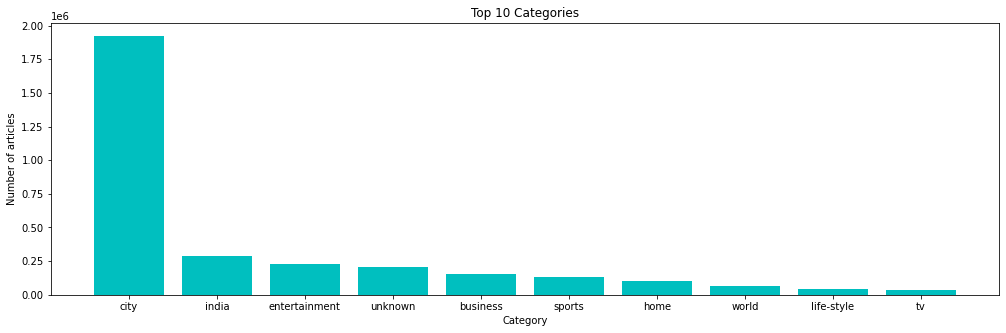

In [220]:
import matplotlib.colors as mcolors
plt.figure(figsize=(17,5))
plt.bar(news_cat.category,height= news_cat.headline_text, color = 'c')
plt.xlabel('Category')
plt.ylabel('Number of articles')
plt.title('Top 10 Categories')
plt.show()

In [221]:
news.drop('headline_category', inplace  = True, axis =1)
news.head()

,publish_date,headline_text,category
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,unknown
1,2001-01-02,Fissures in Hurriyat over Pak visit,unknown
2,2001-01-02,America's unwanted heading for India?,unknown
3,2001-01-02,For bigwigs; it is destination Goa,unknown
4,2001-01-02,Extra buses to clear tourist traffic,unknown


### Cleaning the data -Removing Stop words

In [222]:
headline_text = ' '.join(news['headline_text'].str.lower())

In [223]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\senor\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [224]:
wordcloud = WordCloud(stopwords=stop_words, background_color="white", max_words=1000).generate(headline_text)

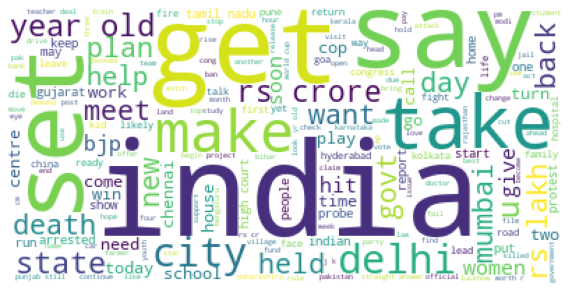

In [225]:
rcParams['figure.figsize'] = 10, 10
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Sentimental Analaysis -- Assigning Polarity to the Headlines

In [226]:
# Create a function to get the subjectivity
def Subjectivity(text):
       return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def Polarity(text):
      return  TextBlob(text).sentiment.polarity

In [227]:
news['Subjectivity'] =news['headline_text'].apply(Subjectivity)
news['Polarity'] =news['headline_text'].apply(Polarity)

In [229]:
import nltk
nltk.download('vader_lexicon')
senti = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\senor\AppData\Roaming\nltk_data...


In [230]:
news['Compound'] = [senti.polarity_scores(s)['compound'] for s in news['headline_text']]
news['Negative'] = [senti.polarity_scores(s)['neg'] for s in news['headline_text']]
news['Neutral'] = [senti.polarity_scores(s)['neu'] for s in news['headline_text']]
news['Positive'] = [senti.polarity_scores(s)['pos'] for s in news['headline_text']]


In [231]:
news.head()

,publish_date,headline_text,category,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,unknown,0.000000,0.00,0.2924,0.000,0.805,0.195
1,2001-01-02,Fissures in Hurriyat over Pak visit,unknown,0.000000,0.00,0.0000,0.000,1.000,0.000
2,2001-01-02,America's unwanted heading for India?,unknown,0.000000,0.00,-0.2263,0.322,0.678,0.000
3,2001-01-02,For bigwigs; it is destination Goa,unknown,0.000000,0.00,0.0000,0.000,1.000,0.000
4,2001-01-02,Extra buses to clear tourist traffic,unknown,0.241667,0.05,0.3818,0.000,0.658,0.342


## Hybrid model - Combining Stocks data and news data

In [232]:
news.rename(columns = {'publish_date':'Date'}, inplace = True)

In [233]:
df_merge = pd.merge(stocks, news, how='inner', on=['Date'])
df_merge.head()

,Date,High,Low,Open,Close,Volume,Adj Close,headline_text,category,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2010-01-04,7.660714,7.585,7.6225,7.643214,493729600.0,6.553025,Bebo Khan't stop loving,entertainment,0.95,0.6000,-0.3089,0.447,0.284,0.268
1,2010-01-04,7.660714,7.585,7.6225,7.643214,493729600.0,6.553025,Chor Bazaari top song of 2009,entertainment,0.50,0.5000,0.2023,0.000,0.735,0.265
2,2010-01-04,7.660714,7.585,7.6225,7.643214,493729600.0,6.553025,2010...movies; magic 'n' more!,entertainment,0.75,0.5625,0.0000,0.000,1.000,0.000
3,2010-01-04,7.660714,7.585,7.6225,7.643214,493729600.0,6.553025,Ministers; Bollywood and cricket!,entertainment,0.00,0.0000,0.0000,0.000,1.000,0.000
4,2010-01-04,7.660714,7.585,7.6225,7.643214,493729600.0,6.553025,Shabana gives a mind-blowing performance!,entertainment,0.00,0.0000,0.0000,0.000,1.000,0.000


In [234]:
df = df_merge[['Close','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]
df.head()


,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,7.643214,0.95,0.6000,-0.3089,0.447,0.284,0.268
1,7.643214,0.50,0.5000,0.2023,0.000,0.735,0.265
2,7.643214,0.75,0.5625,0.0000,0.000,1.000,0.000
3,7.643214,0.00,0.0000,0.0000,0.000,1.000,0.000
4,7.643214,0.00,0.0000,0.0000,0.000,1.000,0.000


In [235]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
new_df = pd.DataFrame(sc.fit_transform(df))
new_df.columns = df.columns
new_df.index = df.index
new_df.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.006041,0.95,0.80000,0.340604,0.447,0.284,0.268
1,0.006041,0.50,0.75000,0.604218,0.000,0.735,0.265
2,0.006041,0.75,0.78125,0.499897,0.000,1.000,0.000
3,0.006041,0.00,0.50000,0.499897,0.000,1.000,0.000
4,0.006041,0.00,0.50000,0.499897,0.000,1.000,0.000


### Spliting Data into Train and test

In [236]:
X = new_df.drop('Close', axis=1)
y =new_df['Close']


In [237]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state = 0)


In [238]:
X_train.shape , X_test.shape

((1413656, 6), (353415, 6))

In [239]:
def func_graph(results,names):
    fig = plt.figure()
    fig.suptitle('MSE value of all Algorithms Comparison')
    ax = fig.add_subplot(111)
    width = 0.5        
    bars=plt.bar(names,results, width, align='center')
    ax.set_xticklabels(names)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x(), yval +0.005, yval)
    plt.show()

In [240]:
from sklearn import metrics

def metric_calc(name,model,category, X_train, Y_train, X_test, Y_test):
    if category =='TRAINING DATA' :
        X_data= X_train
        Y_data=Y_train
    else :
        X_data= X_test
        Y_data=Y_test
        
    model.fit(X_train, Y_train)
    predictions = model.predict(X_data)
    mse =round(metrics.mean_squared_error(predictions,Y_data),4)   
    print('For ', name, 'MSE-Value is ', mse)
    return mse


In [241]:
def func_modelling(i) :
    count=0
    count=count+1
    X = X_train[i]
    Y = Y_train
    x_test = X_test[i]
    seed = 7
    # preparing models list
    models = []
    models.append(('Decision Tree',' DecisiontreeRegressor  ', DecisionTreeRegressor()))
    models.append(('Random Forest',' RandomForestRegressor  ', RandomForestRegressor()))
    models.append(('XG Boost',' XGBRegressor  ', xgboost.XGBRegressor()))
    models.append(('LG Boost',' LGBMRegressor ', lightgbm.LGBMRegressor()))
    models.append(('ADA Boost',' AdaBoostRegressor ', AdaBoostRegressor()))
    results_train = []
    results_test = []
    names = []
    scoring = 'MSE'

    print('Metrics calcuated while TRANING the model')
    for name,label, model in models:
            cv_results_train=metric_calc(name,model,'TRAINING DATA',X,Y, x_test,Y_test)
            results_train.append(cv_results_train)
            names.append(name)
    func_graph(results_train,names)
    
    print('Evaluating the model on TESTING DATA')
    for name,label, model in models:
            cv_results_test=metric_calc(name,model,'TESTING DATA',X,Y, x_test,Y_test)
            results_test.append(cv_results_test)
            #names.append(name)
    func_graph(results_test,names)

### Training the model 

Metrics calcuated while TRANING the model
For  Decision Tree MSE-Value is  0.0245
For  Random Forest MSE-Value is  0.025
For  XG Boost MSE-Value is  0.0284
For  LG Boost MSE-Value is  0.0286
For  ADA Boost MSE-Value is  0.0323


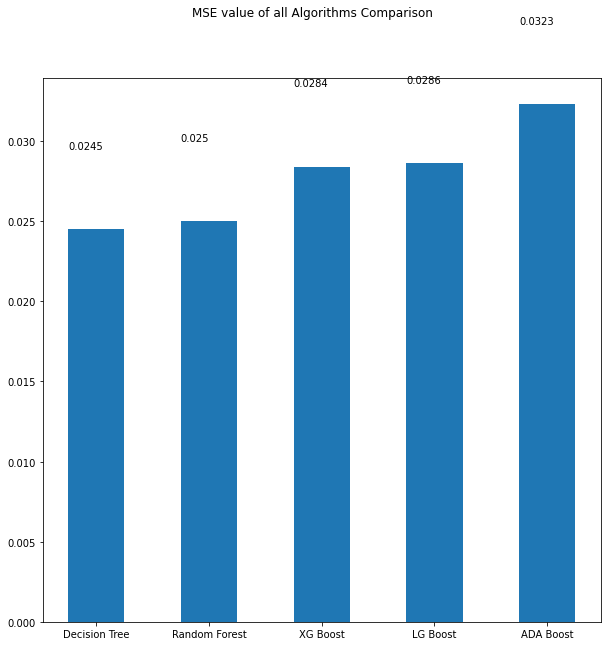

Evaluating the model on TESTING DATA
For  Decision Tree MSE-Value is  0.0321
For  Random Forest MSE-Value is  0.0292
For  XG Boost MSE-Value is  0.0284
For  LG Boost MSE-Value is  0.0285
For  ADA Boost MSE-Value is  0.0321


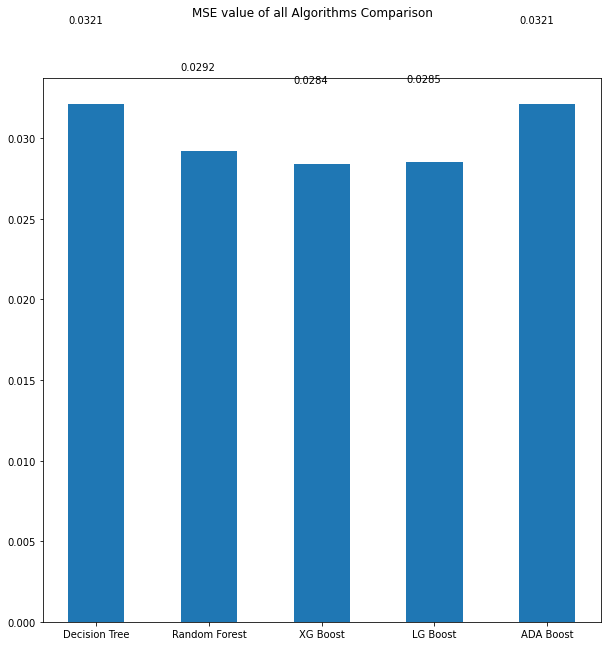

In [242]:
func_modelling(X_train.columns)

LGBMRegressor has the least MSE and it has performed best for sentimental Anaylsis to predict if the stock close price with either increase or decrease depending on the news on that day.